# Covid-19 Detection using Symptoms

## Importing Libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# import function to perform feature selection
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

# import imblearn.under_sampling for Imbalance handling
from imblearn.under_sampling import NearMiss
#from imblearn.over_sampling import SMOTE

#boosting algorithms
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

## Importing Dataset

In [2]:
df=pd.read_csv("27laccorona_tested_individuals_ver_0083.english 2.csv")

In [3]:
df.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [5]:
df.shape

(2742596, 10)

### About Dataset
* Dataset is sourced from the website of Govt. Of Israel
* Dataset is downloaded under open license
* Dataset contains ~27lac rows which are records of actual individuals who got tested for covid


#### COLUMN INFORMATION
 1. test_date            : Date of record creation/actual test
 2. cough                : Whether cough is a symptom
 3. fever                : Whether fever is a symptom
 4. sore_throat          : Whether sore throat is a symptom
 5. shortness_of_breath  : Whether shortness of breath is a symptom
 6. head_ache            : Whether head ache is a symptom
 7. corona_result        : Result of test(covid negative/covid positive)
 8. age_60_and_above     : Whether age of record/individual is above 60
 9. gender               : Gender of record/individual  Male or Female
 10. test_indication      : Whether individual has returned from abroad or has had contact with covid patient
 
 
 
#### DISCLAIMER
* This ML based test is only meant as an initial buffer to help ease the burden on gloabal healthcare systems during a covid spike.
* The results obtained are not medically verified and are subject to the accuracy of the MachineLearning model.
* For a conclusive result please go for an RT-PCR test



## Data Preprocessing

In [11]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2742596.000000,2742596.000000,2742596.000000,2742596.000000,2742596.000000
mean,0.040596,0.035366,0.010969,0.004017,0.021856
std,0.197352,0.184704,0.104158,0.063252,0.146212
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


#### Null handling

In [5]:
#Null Handling

print("Null values in data:",df.isnull().sum().sum())

Null values in data: 640530


In [6]:
#Percentagewise null values in columns
print("Null values in pct(%)")
(df.isnull().sum()/len(df))*100

Null values in pct(%)


test_date              0.000000
cough                  0.000000
fever                  0.000000
sore_throat            0.000000
shortness_of_breath    0.000000
head_ache              0.000000
corona_result          0.000000
age_60_and_above      19.968089
gender                 3.386791
test_indication        0.000000
dtype: float64

In [9]:
# Rows with Null values can be dropped as there is large no of rows in data

In [6]:
#Checking length after dropping nulls
df1=df.dropna()
len(df1)

2186227

In [8]:
df1.isnull().sum().sum()

#Using df1 henceforth

0

#### Converting string columns to 0s 1s

In [7]:
#Column corona_result
df1.corona_result.value_counts()

negative    1943172
positive     208726
other         34329
Name: corona_result, dtype: int64

In [8]:
df1=df1[(df1.corona_result=='negative')|(df1.corona_result=='positive')]      #removing rows with 'other' inconclusive

In [9]:
df1['corona_result']=[0 if x=='negative' else 1 for x in df1['corona_result']]

In [10]:
#Column age_60_and_above
df1.age_60_and_above.value_counts()

No     1869908
Yes     281990
Name: age_60_and_above, dtype: int64

In [11]:
df1['age_60_and_above']=[0 if x=='No' else 1 for x in df1['age_60_and_above']]

In [12]:
#Column gender
df1.gender.value_counts()

female    1106435
male      1045463
Name: gender, dtype: int64

In [13]:
df1['gender']=[0 if x=='female' else 1 for x in df1['gender']]

In [14]:
#Column test_indication
df1.test_indication.value_counts()

Other                     1988259
Contact with confirmed     147809
Abroad                      15830
Name: test_indication, dtype: int64

In [15]:
df1['test_indication'].value_counts()

Other                     1988259
Contact with confirmed     147809
Abroad                      15830
Name: test_indication, dtype: int64

In [16]:
df1['test_indication']=[0 if x=='Other' else 1 for x in df1['test_indication']]

In [17]:
#dfnew=pd.get_dummies(df1,drop_first=True)

In [18]:
df1['test_indication'].value_counts()

0    1988259
1     163639
Name: test_indication, dtype: int64

#### Dropping Irrelevant columns

In [19]:
#Dropping irrelevant columns
#Drop test_date

In [20]:
df1.drop('test_date',axis=1,inplace=True)

#### Changing Datatypes

In [21]:
df1['cough']=df1['cough'].astype(float)
df1['fever']=df1['fever'].astype(float)
df1['sore_throat']=df1['sore_throat'].astype(float)
df1['shortness_of_breath']=df1['shortness_of_breath'].astype(float)
df1['head_ache']=df1['head_ache'].astype(float)
df1['corona_result']=df1['corona_result'].astype(float)
df1['age_60_and_above']=df1['age_60_and_above'].astype(float)
df1['gender']=df1['gender'].astype(float)
df1['test_indication']=df1['test_indication'].astype(float)

## Exploratory Data Analysis

In [22]:
#After PreProcessing
#Length of data, Description metrics

In [23]:
len(df1)

2151898

In [24]:
df1.isnull().sum().sum()

0

In [25]:
df1.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000,2151898.000000
mean,0.040528,0.036959,0.012098,0.004199,0.024427,0.096996,0.131042,0.485833,0.076044
std,0.197195,0.188661,0.109324,0.064661,0.154372,0.295953,0.337447,0.499799,0.265069
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Individual Symptoms compared to Diagnosis(corona_result)

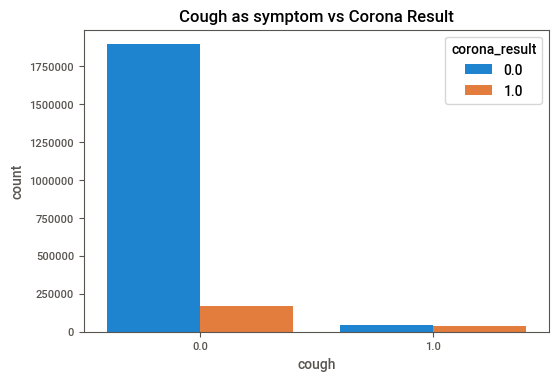

In [26]:
#Cough 
sns.countplot(df1.cough,hue=df1.corona_result)
plt.title('Cough as symptom vs Corona Result')
plt.show()

* Graph shows that almost all records which are corona positive showed cough as a symptom
* Also, cough as a symptom on its own doesnt guarantee corona result = positive

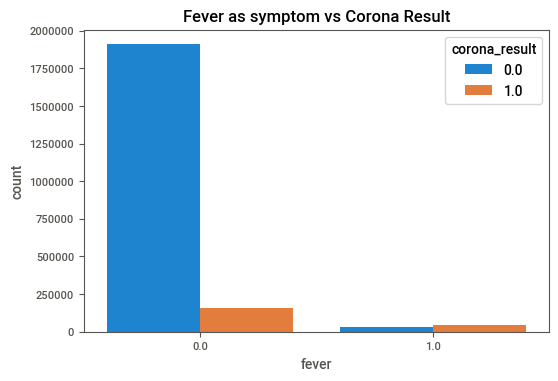

In [27]:
#Fever
sns.countplot(df1.fever,hue=df1.corona_result)
plt.title('Fever as symptom vs Corona Result')
plt.show()

* Plot shows that records with corona=positive tend to have fever but it is not always true
* Also, fever as a symptom doest guarantee corona result=positive

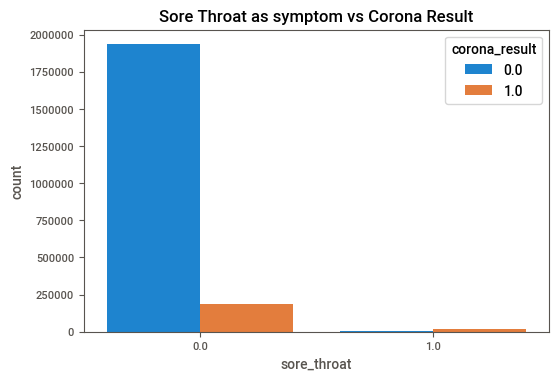

In [28]:
#Sore Throat
sns.countplot(df1.sore_throat,hue=df1.corona_result)
plt.title('Sore Throat as symptom vs Corona Result')
plt.show()

* 

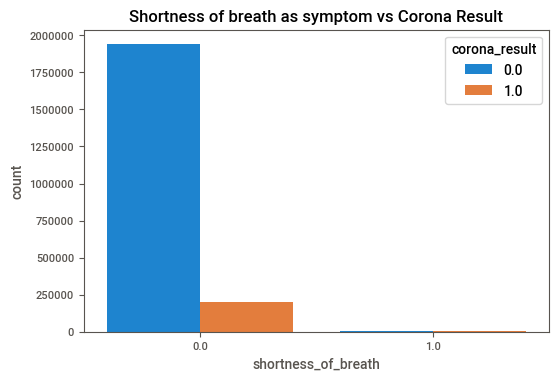

In [29]:
#Shortness of breath
sns.countplot(df1.shortness_of_breath,hue=df1.corona_result)
plt.title('Shortness of breath as symptom vs Corona Result')
plt.show()

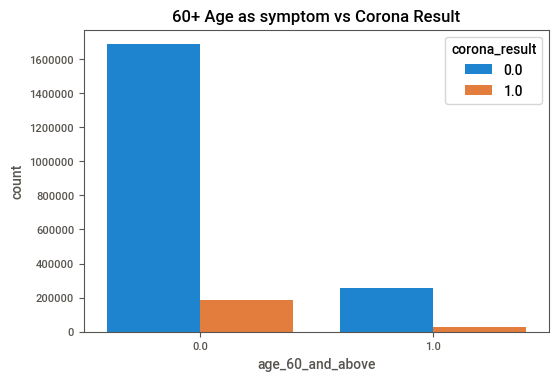

In [30]:
#Age 60 and above
sns.countplot(df1.age_60_and_above,hue=df1.corona_result)
plt.title('60+ Age as symptom vs Corona Result')
plt.show()

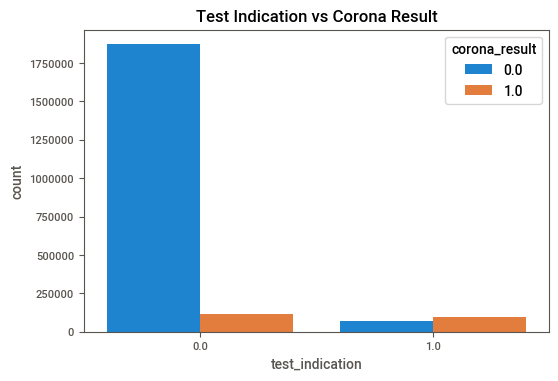

In [31]:
#Test Indication
sns.countplot(df1.test_indication,hue=df1.corona_result)
plt.title('Test Indication vs Corona Result')
plt.show()

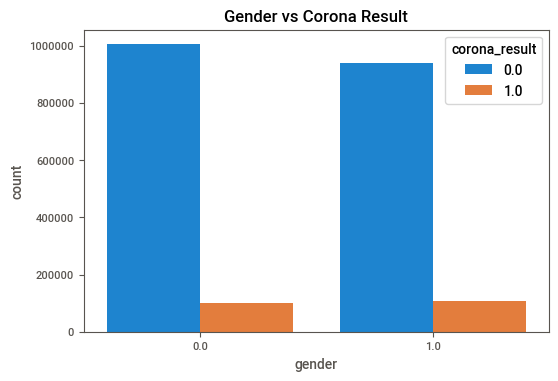

In [32]:
#Gender
sns.countplot(df1.gender,hue=df1.corona_result)
plt.title('Gender vs Corona Result')
plt.show()

### Target Balance Check

In [36]:
df1.corona_result.value_counts()

0.000000    1943172
1.000000     208726
Name: corona_result, dtype: int64

In [37]:
print("Class 0:",df1.corona_result.value_counts()[0]/len(df1)*100,"%")
print("Class 1:",df1.corona_result.value_counts()[1]/len(df1)*100,"%")

Class 0: 90.30037669071676 %
Class 1: 9.699623309283247 %


<AxesSubplot:xlabel='corona_result', ylabel='count'>

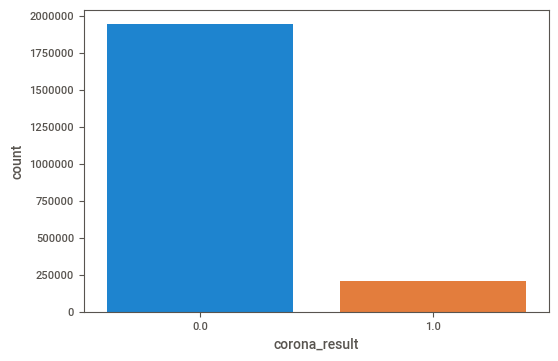

In [38]:
sns.countplot(df1.corona_result)

* Target is imbalanced
* Need to remove imbalance by undersampling 
* Undersampling is feasible as there is a large no. of records

#### UNDERSAMPLING TO BALANCE DATA

In [39]:
#Defining X and y
X=df1.drop('corona_result',axis=1)
y=df1.corona_result

In [35]:
#Not using because SMOTE generated around 10lac new rows for majority class and 36lac new rows for minority class
#Upsampling large no of rows is not very accurate and will tamper with actual data

#Upsampling using SMOTE from imblearn
#oversample = SMOTE(n_jobs=-1)
#X_res, y_res = oversample.fit_resample(X, y)   #3 minutes to execute

In [40]:
##undersampling from imblearn library using NearMiss
nm=NearMiss(n_jobs=-1)                   #using n_jobs=-1 to use all cores
X_res, y_res = nm.fit_resample(X, y)

##Took 12 minutes to execute on Apple Silicon M1 using all 16cores due to sheer no of records
##Execution will take time with lower spec CPU

In [41]:
print("Original Shapes(X,y)",X.shape,y.shape)
print("Resampled Shapes(X,y)",X_res.shape,y_res.shape)

#After Undersampling we are left with 4.17 lac rows

Original Shapes(X,y) (2151898, 8) (2151898,)
Resampled Shapes(X,y) (417452, 8) (417452,)


In [42]:
#Saving old X,y
old_X=X
old_y=y

#Assigning resampled X,y
X=X_res
y=y_res

In [32]:
y.value_counts()

1.000000    208726
0.000000    208726
Name: corona_result, dtype: int64

<AxesSubplot:xlabel='corona_result', ylabel='count'>

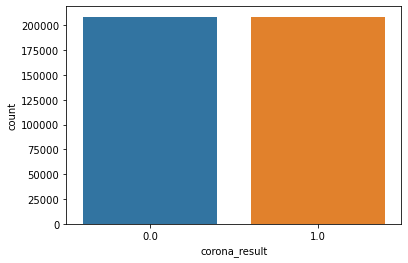

In [33]:
sns.countplot(y)

## MACHINE LEARNING MODELS

## Logsitic Regression

In [34]:
#Defining X and y
#X=df1.drop('corona_result',axis=1)
#y=df1.corona_result

Xc=sm.add_constant(X)  #adding constant

In [35]:
#Train test split

X_train, X_test, y_train, y_test=train_test_split(Xc,y,test_size=0.3,random_state=100)

In [36]:
logreg=sm.Logit(y_train,X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.442411
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:          corona_result   No. Observations:               292216
Model:                          Logit   Df Residuals:                   292207
Method:                           MLE   Df Model:                            8
Date:                Tue, 26 Oct 2021   Pseudo R-squ.:                  0.3617
Time:                        00:10:24   Log-Likelihood:            -1.2928e+05
converged:                       True   LL-Null:                   -2.0255e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.0707      0.008   -141.338      0.000      -1.086      -1.056
c

* All features are significant as all have p-value<0.05

In [37]:
y_pred_prob = logreg.predict(X_test)
y_pred=[0 if x<0.5 else 1 for x in y_pred_prob]

In [38]:
cm=confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

accuracy=(TN+TP)/(TN+TP+FN+FP)
specifity=TN/(TN+FP)
sensit=TP/(TP+FN)
precision=TP/(TP+FP)

print("Accuracy:",accuracy*100,"%")
print("Specifity:",specifity*100,"%")
print("Sensitivity:",sensit*100,"%")
print("Precision:",precision*100,"%")
print("Missclassified:",(1-sensit)*100,"%")


Accuracy: 80.87211344980676 %
Specifity: 96.26204054248335 %
Sensitivity: 65.49054043266544 %
Precision: 94.60332103321034 %
Missclassified: 34.50945956733455 %


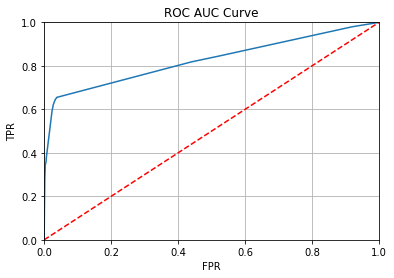

In [39]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.grid(True)
plt.show()

## Decision Tree Classifier

In [274]:
#X=df1.drop('corona_result',axis=1)
#y=df1.corona_result

In [307]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=90)

In [308]:
decision_tree = DecisionTreeClassifier()

decision_tree=decision_tree.fit(X_train,y_train)

y_pred=decision_tree.predict(X_test)

In [309]:
cm=confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

accuracy=(TN+TP)/(TN+TP+FN+FP)
specifity=TN/(TN+FP)
sensit=TP/(TP+FN)
precision=TP/(TP+FP)

print("Accuracy:",accuracy*100,"%")
print("Specifity:",specifity*100,"%")
print("Sensitivity:",sensit*100,"%")
print("Precision:",precision*100,"%")
print("Missclassified:",(1-sensit)*100,"%")


Accuracy: 80.76032450733017 %
Specifity: 96.3284668023526 %
Sensitivity: 65.30069863297102 %
Precision: 94.71193795586743 %
Missclassified: 34.69930136702898 %


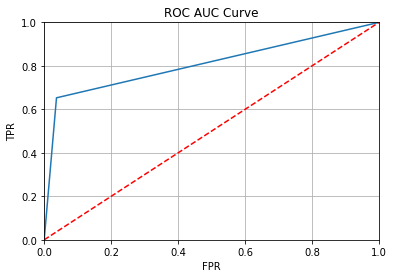

In [310]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.grid(True)
plt.show()

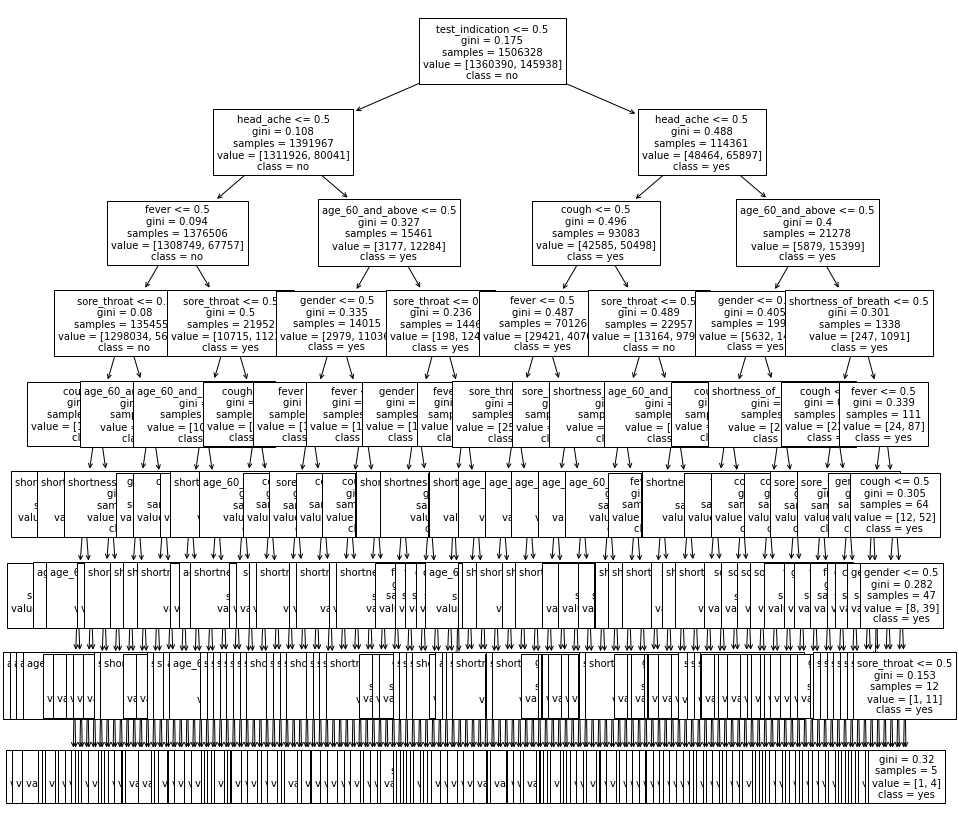

In [97]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,15))
plot_tree(decision_tree,feature_names=X.columns,class_names=['no','yes'],fontsize=10);

#### Cross Validation for hyperparameter tuning

In [284]:
param=[{'criterion':['entropy','gini'],'max_depth':range(2,10),'max_features':['sqrt','log2'],
      'min_samples_split':range(2,10),'min_samples_leaf':range(1,10),'max_leaf_nodes':range(1,10)}]

dtc=DecisionTreeClassifier()

In [286]:
dtc_grid=GridSearchCV(estimator=dtc,param_grid=param,cv=5,n_jobs=-1)

In [311]:
dtc_grid_model=dtc_grid.fit(X_train,y_train)

In [ ]:
dtc_grid_model.best_params_

## Random Forest Model


In [353]:
#X=df1.drop('corona_result',axis=1)
#y=df1.corona_result

#X,y already defined after Undersampling

In [354]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=100)

In [355]:
rfc=RandomForestClassifier(n_estimators=10,random_state=10)

In [356]:
rfc_model=rfc.fit(X_train,y_train)

In [357]:
y_pred=rfc_model.predict(X_test)

In [358]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.96      0.83     62601
         1.0       0.95      0.65      0.77     62635

    accuracy                           0.81    125236
   macro avg       0.84      0.81      0.80    125236
weighted avg       0.84      0.81      0.80    125236



In [359]:
cm=confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

accuracy=(TN+TP)/(TN+TP+FN+FP)
specifity=TN/(TN+FP)
sensit=TP/(TP+FN)
precision=TP/(TP+FP)

print("Accuracy:",accuracy*100,"%")
print("Specifity:",specifity*100,"%")
print("Sensitivity:",sensit*100,"%")
print("Precision:",precision*100,"%")
print("Missclassified:",(1-sensit)*100,"%")


Accuracy: 80.87211344980676 %
Specifity: 96.26204054248335 %
Sensitivity: 65.49054043266544 %
Precision: 94.60332103321034 %
Missclassified: 34.50945956733455 %


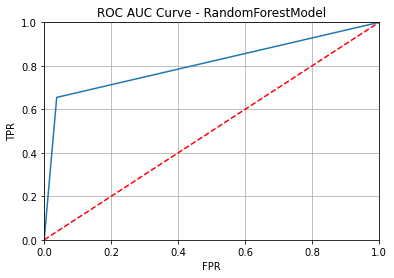

In [373]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve - RandomForestModel")
plt.grid(True)
plt.savefig("RFC roc.png", bbox_inches='tight', dpi=600)
plt.show()

In [364]:
imp_feat=pd.DataFrame({'Features':X_train.columns,'Importance':rfc_model.feature_importances_})
imp_feat_1=imp_feat.sort_values(by='Importance',ascending=False)
imp_feat_1

,Features,Importance
7,test_indication,0.542886
1,fever,0.192888
4,head_ache,0.110921
0,cough,0.080654
2,sore_throat,0.052805
3,shortness_of_breath,0.014078
5,age_60_and_above,0.003623
6,gender,0.002146


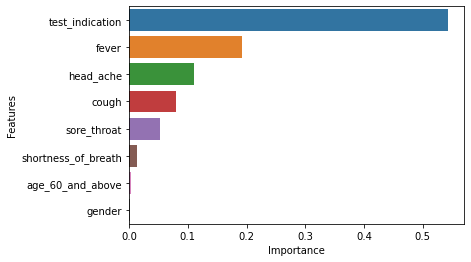

In [370]:
sns.barplot(data=imp_feat_1,y='Features',x='Importance')
plt.savefig("feat_imp.png", bbox_inches='tight', dpi=600)
plt.show()

#### Cross Validation for hyperparameter tuning

In [350]:
param=[{'criterion':['entropy','gini'],'n_estimators':[10,30,50,70,90],'max_depth':[10,15,20],
        'max_features':['sqrt','log2'],'min_samples_split':[2,5,8,11],'min_samples_leaf':[1,5,7,9],
        'max_leaf_nodes':[2,5,8]}]

rfc=RandomForestClassifier()

In [351]:
rfc_grid=GridSearchCV(estimator=rfc,param_grid=param,cv=5)

In [374]:
rfc_grid_model=rfc_grid.fit(X_train,y_train)

In [ ]:
rfc_grid_model.best_params_

#### RandomForest model using tuned hyperparameters

## KNN Model

In [321]:
#X,y defined

In [322]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [323]:
knn=KNeighborsClassifier()
knn_model=knn.fit(X_train,y_train)
y_pred=knn_model.predict(X_test)

In [324]:
cm=confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

accuracy=(TN+TP)/(TN+TP+FN+FP)
specifity=TN/(TN+FP)
sensit=TP/(TP+FN)
precision=TP/(TP+FP)

print("Accuracy:",accuracy*100,"%")
print("Specifity:",specifity*100,"%")
print("Sensitivity:",sensit*100,"%")
print("Precision:",precision*100,"%")
print("Missclassified:",(1-sensit)*100,"%")


Accuracy: 80.68846018716663 %
Specifity: 96.22933554605221 %
Sensitivity: 65.12274645186038 %
Precision: 94.51854601127376 %
Missclassified: 34.87725354813962 %


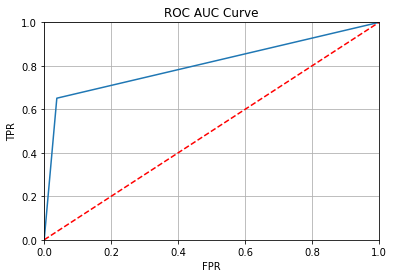

In [325]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.grid(True)
plt.show()

## ADA Boost

In [334]:
abc=AdaBoostClassifier(n_estimators=50)

In [335]:
ada_model=abc.fit(X_train,y_train)
y_pred=ada_model.predict(X_test)

In [336]:
cm=confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

accuracy=(TN+TP)/(TN+TP+FN+FP)
specifity=TN/(TN+FP)
sensit=TP/(TP+FN)
precision=TP/(TP+FP)

print("Accuracy:",accuracy*100,"%")
print("Specifity:",specifity*100,"%")
print("Sensitivity:",sensit*100,"%")
print("Precision:",precision*100,"%")
print("Missclassified:",(1-sensit)*100,"%")


Accuracy: 80.57826822958255 %
Specifity: 96.27401544647986 %
Sensitivity: 64.85743511059967 %
Precision: 94.55901200046604 %
Missclassified: 35.14256488940033 %


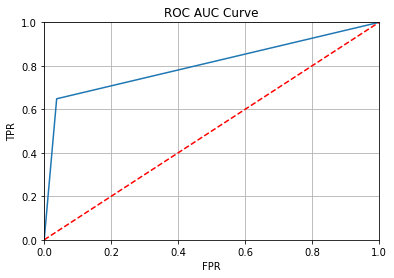

In [337]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.grid(True)
plt.show()

#### Cross Validation for hyperparameter tuning

In [261]:
from sklearn.model_selection import GridSearchCV

params=[{'n_estimators':[10,20,50],'learning_rate':[0.1,0.4,1.0]}]

aboost=AdaBoostClassifier()

In [262]:
ada_grid=GridSearchCV(estimator=aboost,param_grid=params,cv=5)

In [263]:
ada_grid_model=ada_grid.fit(X_train,y_train)

In [264]:
ada_grid_model.best_params_

{'learning_rate': 0.4, 'n_estimators': 20}

#### AdaBoost using tuned hyperparameters

In [329]:
abc_cv=AdaBoostClassifier(n_estimators=20,learning_rate=0.4)

In [330]:
ada_model_1=abc_cv.fit(X_train,y_train)
y_pred=ada_model_1.predict(X_test)

In [267]:
cm=confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

specifity=TN/(TN+FP)
sensit=TP/(TP+FN)

print("Specifity:",specifity*100,"%")
print("Sensitivity:",sensit*100,"%")
print("Missclassified:",(1-sensit)*100,"%")

Specifity: 96.26204054248335 %
Sensitivity: 65.49054043266544 %
Missclassified: 34.50945956733455 %


In [268]:
print("AdaBoost Model has accuracy of:",np.round(accuracy_score(y_test,y_pred),3)*100,"%")

AdaBoost Model has accuracy of: 80.9 %


## GradientBoost

In [338]:
gbc=GradientBoostingClassifier()

In [339]:
gbcmodel=gbc.fit(X_train,y_train)
y_pred=gbcmodel.predict(X_test)

In [340]:
cm=confusion_matrix(y_test,y_pred)

TN=cm[0][0]
FP=cm[0][1]
FN=cm[1][0]
TP=cm[1][1]

accuracy=(TN+TP)/(TN+TP+FN+FP)
specifity=TN/(TN+FP)
sensit=TP/(TP+FN)
precision=TP/(TP+FP)

print("Accuracy:",accuracy*100,"%")
print("Specifity:",specifity*100,"%")
print("Sensitivity:",sensit*100,"%")
print("Precision:",precision*100,"%")
print("Missclassified:",(1-sensit)*100,"%")


Accuracy: 80.68846018716663 %
Specifity: 96.22933554605221 %
Sensitivity: 65.12274645186038 %
Precision: 94.51854601127376 %
Missclassified: 34.87725354813962 %


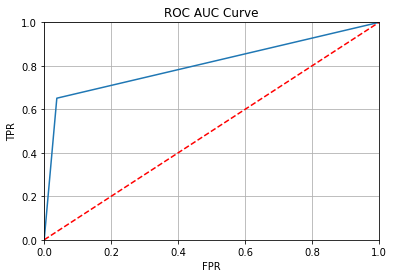

In [341]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.plot([0,1],[0,1],'r--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC AUC Curve")
plt.grid(True)
plt.show()

## Implementation / Initial Deployment

In [65]:
input1={'cough':[0],'fever':[0],'sore_throat':[0],'shortness_of_breath':[0],'head_ache':[0],'age_60_and_above':[0]
        ,'gender':[0],'test_indication':[1]}

In [68]:

#Input user info
print("Input Labels:     0->NO     1->YES\n")
cough=int(input("# Are you experiencing cough as a symptom: "))
fever=int(input("# Are you experiencing fever as a symptom: "))
sore_throat=int(input("# Are you experiencing sore throat as a symptom: "))
shortness=int(input("# Are you experiencing shortness of breath: "))
headache=int(input("# Are you experiencing headache: "))
age60=int(input("# Are you 60years old or above: "))

print("\nAdditional Info:")
gender=int(input("# Gender (F->0,M->1)\nInput: "))
testind=int(input("\nContact metric\n# If contact with confirmed covid person(1) \n# If you have returned from abroad(2) \n# None(0)\nInput:  "))

#Feeding into dictionary
input1.clear() #Empty input1 dict
input1['cough']=cough
input1['fever']=fever
input1['sore_throat']=sore_throat
input1['shortness_of_breath']=shortness
input1['head_ache']=headache
input1['age_60_and_above']=age60
input1['gender']=gender
input1['test_indication']=testind

#Converting input1 dict to DataFrame to pass into model
input1df=pd.DataFrame(input1,index=np.arange(1))

Input Labels:     0->NO     1->YES

# Are you experiencing cough as a symptom: 0
# Are you experiencing fever as a symptom: 1
# Are you experiencing sore throat as a symptom: 1
# Are you experiencing shortness of breath: 1
# Are you experiencing headache: 0
# Are you 60years old or above: 0

Additional Info:
# Gender (F->0,M->1)
Input: 0

Contact metric
# If contact with confirmed covid person(1) 
# If you have returned from abroad(2) 
# None(0)
Input:  0


In [69]:
#Prediction
#Using Random Forest model as it has 81% accuracy
prediction=rfc_model.predict(input1df)
if prediction[0]==0:
    print("YOU ARE COVID NEGATIVE!!")
    print("Perfom this test again if you experience additional symptoms")
else:
    print("YOU ARE COVID POSITIVE!!")
    print("You are advised to take an RT-PCT test for more conclusive result")

YOU ARE COVID POSITIVE!!
You are advised to take an RT-PCT test for more conclusive result
